<a href="https://colab.research.google.com/github/Abhishek264/ml-bootcamp/blob/main/ML_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Car.csv")

In [3]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
data.shape

(804, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

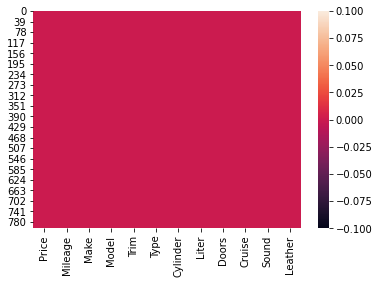

In [8]:
sns.heatmap(data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


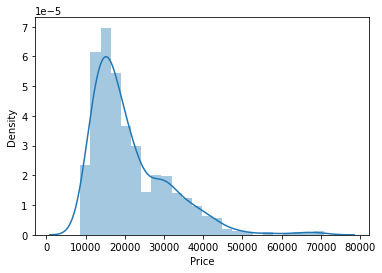

In [9]:
sns.distplot(data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


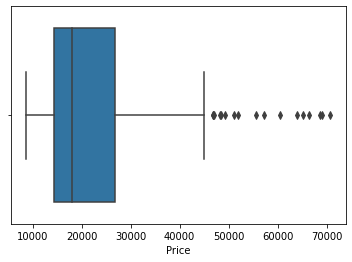

In [10]:
sns.boxplot(data['Price'])

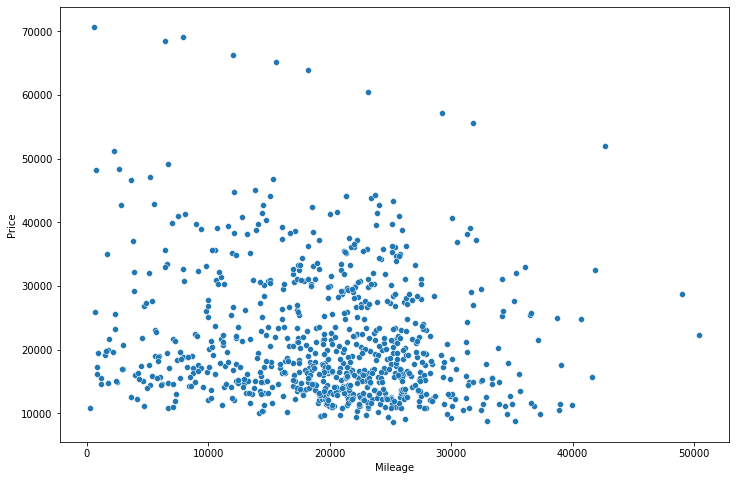

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Mileage",y="Price",data=data)

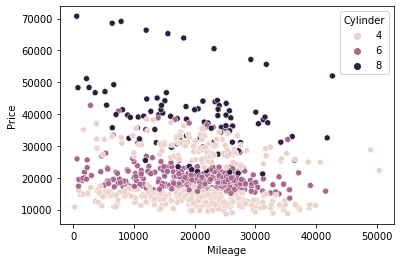

In [13]:
sns.scatterplot(x="Mileage",y="Price",data=data,hue='Cylinder')

In [15]:
data['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


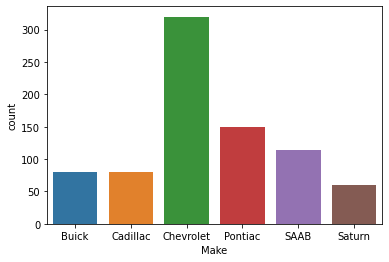

In [16]:
sns.countplot(data['Make'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

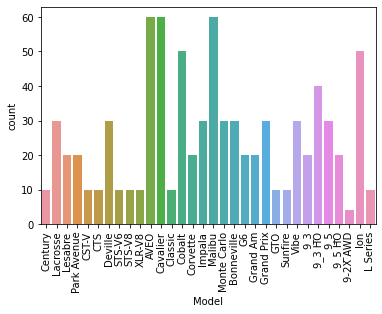

In [18]:
sns.countplot(data["Model"])
plt.xticks(rotation=90)
plt.show

In [19]:
from sklearn.preprocessing import MinMaxScaler
cat_col=['Make','Model','Trim','Type']
df_2= pd.get_dummies(data[cat_col],drop_first=True)

In [21]:
scale=MinMaxScaler()
data['Mileage1']=scale.fit_transform(data[['Mileage']])

In [22]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0.158716
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.176952
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.257976
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0.320744
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0.390375


In [23]:
data.drop(cat_col,axis=1,inplace=True)

In [24]:
data.drop('Mileage',axis=1,inplace=True)

In [25]:
data.head()

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,6,3.1,4,1,1,1,0.158716
1,17542.03608,6,3.1,4,1,1,0,0.176952
2,16218.84786,6,3.1,4,1,1,0,0.257976
3,16336.91314,6,3.1,4,1,0,0,0.320744
4,16339.17032,6,3.1,4,1,0,1,0.390375


In [27]:
data_new=pd.concat([data,df_2],axis=1)

In [28]:
data_new.head()

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,...,Trim_Coupe 2D,Trim_Custom Sedan 4D,Trim_DHS Sedan 4D,Trim_DTS Sedan 4D,Trim_GT Coupe 2D,Trim_GT Sedan 4D,Trim_GT Sportwagon,Trim_GTP Sedan 4D,Trim_GXP Sedan 4D,Trim_Hardtop Conv 2D,Trim_L300 Sedan 4D,Trim_LS Coupe 2D,Trim_LS Hatchback 4D,Trim_LS MAXX Hback 4D,Trim_LS Sedan 4D,Trim_LS Sport Coupe 2D,Trim_LS Sport Sedan 4D,Trim_LT Coupe 2D,Trim_LT Hatchback 4D,Trim_LT MAXX Hback 4D,Trim_LT Sedan 4D,Trim_Limited Sedan 4D,Trim_Linear Conv 2D,Trim_Linear Sedan 4D,Trim_Linear Wagon 4D,Trim_MAXX Hback 4D,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,6,3.1,4,1,1,1,0.158716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,17542.03608,6,3.1,4,1,1,0,0.176952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16218.84786,6,3.1,4,1,1,0,0.257976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,16336.91314,6,3.1,4,1,0,0,0.320744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,16339.17032,6,3.1,4,1,0,1,0.390375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [29]:
x = data_new[['Mileage1']]
y = data_new[['Price']]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr.predict(x_test)

array([[20894.67196048],
       [20407.19266519],
       [21466.03201453],
       [20632.98205625],
       [20590.75944012],
       [20464.20448643],
       [21917.49790194],
       [20954.05457032],
       [19420.94460508],
       [20150.01854878],
       [21834.18161664],
       [21130.84766352],
       [20737.40964961],
       [20152.95381087],
       [21394.90835635],
       [21848.18055889],
       [20981.82666542],
       [21352.68574022],
       [23483.23443419],
       [22803.04389365],
       [20451.44738584],
       [22748.51575571],
       [23270.87951191],
       [20946.26483633],
       [20879.65696597],
       [22393.34904358],
       [21048.20874639],
       [22563.25556035],
       [23023.8659181 ],
       [21373.23257481],
       [20925.71800174],
       [21451.35570411],
       [21334.96127303],
       [22969.78935894],
       [19722.82502091],
       [22568.33582165],
       [21685.38640794],
       [20585.56628412],
       [21937.14157896],
       [22191.94490677],


In [33]:
y_test

,Price
226,12207.87293
49,17645.74504
414,17553.75368
556,16997.69374
338,12495.97075
...,...
668,24173.52588
705,30575.24882
319,12741.19023
435,17173.94232


In [34]:
predict=lr.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predict)


99438975.94853157